# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_study_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview

combined_study_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [166]:
# Checking the number of mice.
number_of_mice = len(combined_study_df["Mouse ID"].unique())
print(number_of_mice)

249


In [167]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# This gets the unique combination of Mouse ID and Timepoint. There should be only a count of 1 in each instance if there are no duplicates
duplicate_mice_df = combined_study_df[["Mouse ID","Timepoint"]].value_counts(ascending=False)

# Doing minor manipulation to the resulting dataframe to facilitate extracting the ID for the duplicate mice and for readability
duplicate_mice_df = duplicate_mice_df.reset_index()
duplicate_mice_df = duplicate_mice_df.rename(columns={0:"counts"})

# Reducing the df to only the duplicate mice and then visualizing the results.
duplicate_mice_df = (duplicate_mice_df.loc[duplicate_mice_df["counts"] >1,:])["Mouse ID"].unique()
duplicate_mice_df


array(['g989'], dtype=object)

In [168]:
# Personal note --> another way to find/clean duplicates

# This code produces an array of the indices that are not duplicated
not_duplicate_mice = combined_study_df.duplicated(subset=['Mouse ID','Timepoint']).reset_index()
not_duplicate_mice
#TODO 1 --> need to find how reconcile this against the original file and thus drop the duplicated mice

,index,0
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
1888,1888,False
1889,1889,False
1890,1890,False
1891,1891,False


In [169]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_study_df.loc[(combined_study_df["Mouse ID"] == duplicate_mice_df[0]),:]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [170]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Simply using the loc method to just keep Mouse ID's that are different to the ID of the duplicate mice
combined_study_df = combined_study_df.loc[combined_study_df["Mouse ID"] != duplicate_mice_df[0],:]

combined_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [171]:
# Checking the number of mice in the clean DataFrame.

number_of_mice_clean= len(combined_study_df["Mouse ID"].unique())
number_of_mice_clean


248

## Summary Statistics

In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupby_drug_regimen = combined_study_df.groupby(combined_study_df["Drug Regimen"])
groupby_drug_regimen.head(2)

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

groupby_drug_regimen_mean = (groupby_drug_regimen.mean(numeric_only=True))["Tumor Volume (mm3)"]
groupby_drug_regimen_median = (groupby_drug_regimen.median(numeric_only=True))["Tumor Volume (mm3)"]
groupby_drug_regimen_variance = (groupby_drug_regimen.var(numeric_only=True))["Tumor Volume (mm3)"]
groupby_drug_regimen_std = (groupby_drug_regimen.std(numeric_only=True))["Tumor Volume (mm3)"]
groupby_drug_regimen_sem = (groupby_drug_regimen.sem(numeric_only=True))["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.

summary_statistics_df = pd.DataFrame({
                                "Mean Tumor Volume":groupby_drug_regimen_mean,
                                "Median Tumor Volume":groupby_drug_regimen_median,
                                "Tumor Volume Variance":groupby_drug_regimen_variance,
                                "Tumor Volume Std. Dev.":groupby_drug_regimen_std,
                                "Tumor Volume Std. Err.":groupby_drug_regimen_sem,
                                })
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [173]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#  NOTE --> I'm doing the step below only to improve readeability of the results' title, it is not require to obtain the results
reduced_combined_study_df = combined_study_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Using the aggregation method, produce the same summary statistics in a single line.
(reduced_combined_study_df.groupby(reduced_combined_study_df["Drug Regimen"]).agg(['mean','median','var',"std",'sem']))


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

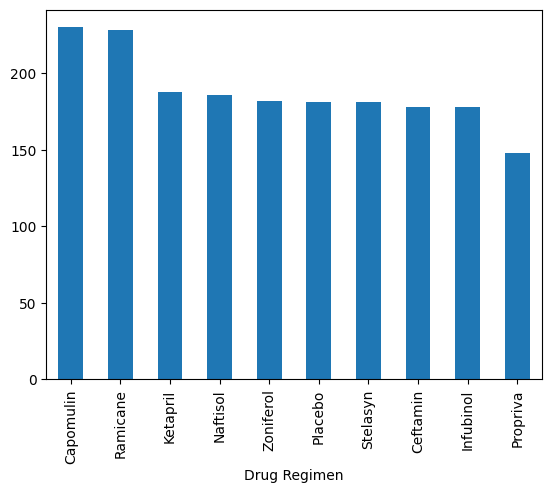

In [174]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count_per_regimen_df = combined_study_df.groupby(combined_study_df["Drug Regimen"]).count()
mice_count_per_regimen_df= mice_count_per_regimen_df["Timepoint"].sort_values(ascending=False)

mice_count_per_regimen_df.plot(kind="bar")
plt.show()


<BarContainer object of 10 artists>

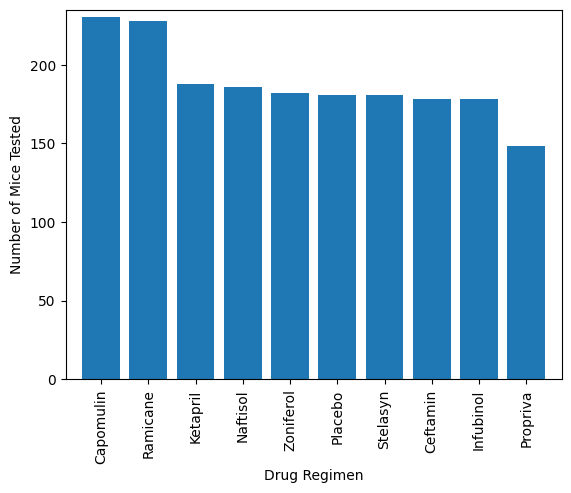

In [175]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count_per_regimen_df.index.to_list()
y_axis = mice_count_per_regimen_df.to_list()

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 5)
plt.xticks(rotation = 90)

plt.bar(x_axis,y_axis,alpha=1.0, align="center")

<AxesSubplot: ylabel='Mouse ID'>

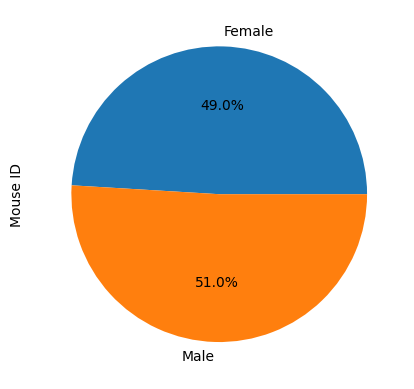

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_count_per_sex_df = combined_study_df.groupby(combined_study_df["Sex"]).count()
mice_count_per_sex_df = mice_count_per_sex_df["Mouse ID"]

mice_count_per_sex_df.plot(kind="pie", autopct="%1.1f%%")




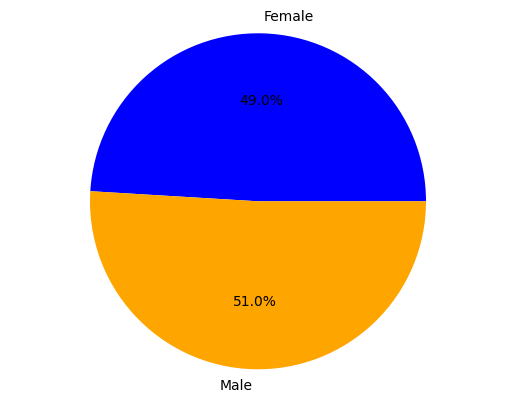

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_labels = mice_count_per_sex_df.index.to_list()
sex_count = mice_count_per_sex_df.to_list()

colors = ["blue", "orange"]

plt.pie(sex_count,labels=sex_labels,colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mice = (combined_study_df.groupby(combined_study_df["Mouse ID"]).max())["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_tumor = pd.merge(combined_study_df,max_timepoint_per_mice,on="Mouse ID")
max_tumor= max_tumor.loc[(max_tumor["Timepoint_x"] == max_tumor["Timepoint_y"]),:]
max_tumor.reset_index(drop=True)

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,35,71.905117,0,Ketapril,Female,2,29,35
3,a457,10,49.783419,0,Ketapril,Female,11,30,10
4,c819,40,62.175705,1,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17,45
244,i557,45,47.685963,1,Capomulin,Female,1,24,45
245,m957,45,33.329098,1,Capomulin,Female,3,19,45
246,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [184]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# NOTE: the code below is a programatic way in which you could get all the treatments
    # drug_regimen = mice_count_per_regimen_df.index.to_list()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = [[],[],[],[]]

# TODO: How to create the empty list in a programatic way?

for i in range(len(drug_regimen)):
    for index, row in max_tumor.iterrows():
        if drug_regimen[i] == row["Drug Regimen"]:
            tumor_volumes[i].append(row['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for i in range(len(tumor_volumes)):
    quartiles = pd.DataFrame(tumor_volumes[i]).quantile([.25,.5,.75])
    lowerq = quartiles.loc[(0.25),0]
    upperq = quartiles.loc[(0.75),0]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"\n{drug_regimen[i]}")
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    
    for item in tumor_volumes[i]:
        if item > upper_bound:
            print(f"{item:.2f} is an outlier")
        elif item < lower_bound:
            print(f"{item:.2f} is an outlier")
    


Capomulin
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.

Ramicane
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Infubinol
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
36.32 is an outlier

Ceftamin
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


/var/folders/v7/61jxc77x4_12lwrhn3fh50yr0000gn/T/ipykernel_29711/685249912.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_regimen)


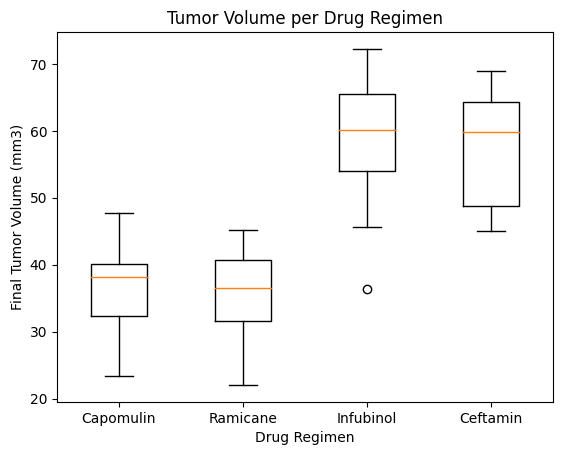

In [180]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(drug_regimen)
ax1.boxplot(tumor_volumes)
plt.show()


## Line and Scatter Plots

In [181]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [182]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [183]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

